<a href="https://colab.research.google.com/github/Palak-Malhotra/Asteroids/blob/main/Open_Asteriods/Open_Asteriods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import seed
seed(42)

import keras
import keras.backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df=pd.read_csv('/content/Asteroid_Updated.csv',nrows = 30000)

In [ ]:
df.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
df_null = pd.DataFrame(np.round(100*df.isnull().sum()/df.shape[0],4))
df_null

,0
name,44.9400
a,0.0000
e,0.0000
i,0.0000
om,0.0000
w,0.0000
q,0.0000
ad,0.0000
per_y,0.0000
data_arc,0.0000


In [ ]:
#Printing the first ten unique values of each feature
for column in df.columns:
    print(column, df[column].unique()[:10])

name ['Ceres' 'Pallas' 'Juno' 'Vesta' 'Astraea' 'Hebe' 'Iris' 'Flora' 'Metis'
 'Hygiea']
a [2.76916515 2.77246592 2.66914952 2.3614179  2.57424892 2.42515999
 2.38533381 2.20176419 2.38563654 3.14153918]
e [0.07600903 0.23033682 0.25694232 0.08872146 0.19109451 0.20300711
 0.23120579 0.15649925 0.12311427 0.11246066]
i [10.59406704 34.83623442 12.98891913  7.14177081  5.36698822 14.7379011
  5.52365139  5.88695456  5.57681551  3.83156003]
om [ 80.30553157 173.08006275 169.85275981 103.81080443 141.57660464
 138.64020276 259.56323069 110.88932989  68.9085767  283.20216686]
w [ 73.59769412 310.04885743 248.13862618 150.72854129 358.68760727
 239.80749023 145.26510583 285.28746222   6.41736923 312.31520625]
q [2.5586836  2.13386493 1.98333205 2.15190945 2.08232409 1.93283527
 1.83383082 1.85718974 2.09193063 2.78823962]
ad [2.97964671 3.41106691 3.35496699 2.57092634 3.06617375 2.91748471
 2.93683681 2.54633864 2.67934244 3.49483874]
per_y [4.6082018  4.61644353 4.36081392 3.62883714 4.13

In [ ]:
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce')
dropindexes = df['diameter'][df['diameter'].isnull()].index
dropped_df = df.loc[dropindexes]
df_asteroid = df.drop(dropindexes, axis=0)
More_Na = df_asteroid.columns[df_asteroid.isna().sum()/df_asteroid.shape[0] > 0.5]
df_asteroid = df_asteroid.drop(More_Na, axis=1)
df_asteroid = df_asteroid.drop(['condition_code', 'neo', 'pha', 'albedo', 'H', 'class'],axis=1)
df_asteroid = df_asteroid.fillna(df_asteroid.mean())
df_asteroid = df_asteroid.drop(columns=['name'])

In [ ]:
df_asteroid.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,diameter,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822,1002,939.400,1.59478,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318,8490,545.000,1.23324,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684,7104,246.596,1.03454,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288,9325,525.400,1.13948,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507,2916,106.699,1.09589,0.238632,1508.600458,282.366289


In [ ]:
df_asteroid = df_asteroid.fillna(df_asteroid.mean())
df_asteroid.isnull().sum()

a             0
e             0
i             0
om            0
w             0
q             0
ad            0
per_y         0
data_arc      0
n_obs_used    0
diameter      0
moid          0
n             0
per           0
ma            0
dtype: int64

In [ ]:
# Retrieve all columns of the DataFrame
all_columns = df_asteroid.columns
print("All Columns:\n", all_columns)


All Columns:
 Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'diameter', 'moid', 'n', 'per', 'ma'], dtype='object')


In [ ]:
import numpy as np
import pandas as pd

# Assuming df_asteroid is your DataFrame

# Apply log transformation to 'diameter' column
df_asteroid['diameter'] = np.log(df_asteroid['diameter'])

# Apply log transformation to other numerical columns
for column in df_asteroid.columns.drop(['diameter']):
    if np.issubdtype(df_asteroid[column].dtype, np.number):  # Check if column contains numeric data
        df_asteroid['log_' + column] = np.log(df_asteroid[column] + 1)  # Add 1 to handle potential zeros


In [ ]:
df_asteroid.corr()['diameter'].abs().sort_values(ascending=False)



diameter          1.000000
log_per           0.622490
log_per_y         0.618232
log_a             0.616982
log_n             0.613650
log_ad            0.600715
n                 0.596115
data_arc          0.583292
log_moid          0.549746
log_q             0.539350
n_obs_used        0.531380
log_data_arc      0.522780
a                 0.500553
log_n_obs_used    0.487315
moid              0.477567
ad                0.476470
q                 0.473422
per               0.316803
per_y             0.316803
i                 0.255413
log_i             0.233221
e                 0.055441
log_e             0.054782
ma                0.030869
log_ma            0.017182
log_w             0.004686
w                 0.004292
log_om            0.002509
om                0.001198
Name: diameter, dtype: float64

# **Visualization**

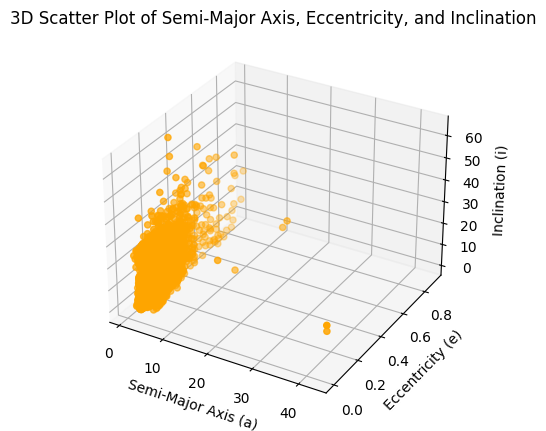

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df_asteroid['a'], df_asteroid['e'], df_asteroid['i'], c='orange', marker='o')

# Set labels and title
ax.set_xlabel('Semi-Major Axis (a)')
ax.set_ylabel('Eccentricity (e)')
ax.set_zlabel('Inclination (i)')
ax.set_title('3D Scatter Plot of Semi-Major Axis, Eccentricity, and Inclination')

# Show plot
plt.show()



# **Splitting the dataframe into train and test dataframes and normalizing them for our regressions.**

In [ ]:
from sklearn.model_selection import train_test_split

predictors = df_asteroid.drop('diameter',axis=1)
target = df_asteroid['diameter']

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.head()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,moid,n,per,ma,log_a,log_e,log_i,log_om,log_w,log_q,log_ad,log_per_y,log_data_arc,log_n_obs_used,log_moid,log_n,log_per,log_ma
11845,2.534142,0.121263,4.666367,92.991154,341.723868,2.226844,2.841441,4.034175,16099,1970,1.242370,0.244319,1473.482454,238.975999,1.262471,0.114456,1.734548,4.543201,5.836925,1.171505,1.345847,1.616250,9.686575,7.586296,0.807533,0.218589,7.296062,5.480539
931,2.420244,0.090319,8.113071,14.973029,49.782886,2.201650,2.638838,3.765277,36381,2412,1.223030,0.261767,1375.267306,226.898964,1.229712,0.086470,2.209710,2.770902,3.927559,1.163666,1.291664,1.561356,10.501829,7.788626,0.798871,0.232513,7.227130,5.428902
4617,2.627532,0.292301,11.473600,342.891153,61.760667,1.859502,3.395561,4.259220,27297,1270,0.897468,0.231410,1555.680257,248.515041,1.288552,0.256424,2.523614,5.840325,4.139329,1.050647,1.480595,1.659983,10.214569,7.147559,0.640520,0.208160,7.350311,5.519519
2290,3.043640,0.065147,24.491739,169.492215,296.486269,2.845355,3.241924,5.310043,40370,2223,1.919340,0.185615,1939.493268,335.582209,1.397145,0.063113,3.238354,5.138690,5.695368,1.346866,1.445017,1.842143,10.605867,7.707063,1.071358,0.170262,7.570697,5.818842
27554,3.071534,0.061422,10.541331,52.202467,85.381955,2.882874,3.260194,5.383208,8059,931,1.921900,0.183093,1966.216798,279.827110,1.404020,0.059610,2.445935,3.974105,4.458779,1.356576,1.449315,1.853671,8.994669,6.837333,1.072234,0.168132,7.584375,5.637739


In [ ]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

# Fit the standard scaler on X_train
std_scaler = StandardScaler().fit(X_train)

# Function for scaling input data
def scaler(X):
    x_norm_arr = std_scaler.transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index=X.index)

# Function for inverting the scaling
def inverse_scaler(X):
    x_norm_arr = std_scaler.inverse_transform(X)
    return pd.DataFrame(x_norm_arr, columns=X.columns, index=X.index)


In [ ]:
from sklearn.metrics import r2_score
import seaborn as sns

def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7))
    sns.distplot(Y_test.values,label='test values', ax=ax1)
    sns.distplot(prediction ,label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='orange',label='predictions')
    ax2.plot(Y_test,Y_test,c='blue',label='y=x')
    ax2.set_xlabel('test value')
    ax2.set_ylabel('estimated ')
    ax1.legend()
    ax2.legend()
    ax2.axis('scaled') #same x y scale
def score(prediction):
    score = r2_score(prediction,Y_test)
    return score
def announce(score):
    print('The R^2 score achieved using this regression is:', round(score,3))
algorithms = []
scores = []


# **ML:-MODELS**

1)LINEAR REGRESSION

2)ENET

3)K-NN

4)D-TREE

5)R-FOREST

6)SVM

7)NNET

8)NNET WITH RMSPROP

9)XGB



In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = score(Y_pred_lr)
announce(score_lr)
algorithms.append('LR')
scores.append(score_lr)

The R^2 score achieved using this regression is: 0.801


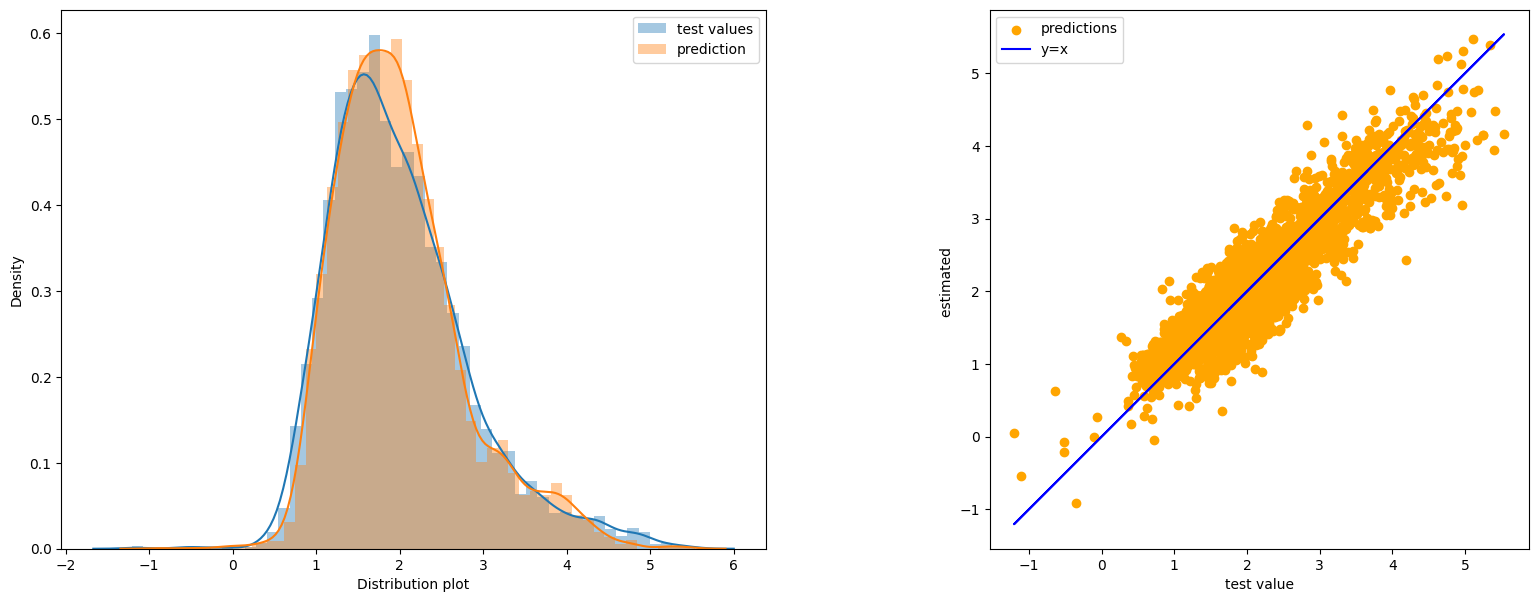

In [ ]:
plot(Y_pred_lr)

In [ ]:
from sklearn.linear_model import ElasticNetCV

# Define ElasticNetCV model with specified hyperparameters
enet = ElasticNetCV(cv=9, max_iter=10000)

# Train the ElasticNetCV model using preprocessed data
enet.fit(X_train_norm, np.ravel(Y_train))

# Make predictions on the test data
Y_pred_enet = enet.predict(X_test_norm)

# Calculate the R-squared score
score_enet = score(Y_pred_enet)

# Print the R-squared score
announce(score_enet)

# Append the results to the lists
algorithms.append('eNet')
scores.append(score_enet)


The R^2 score achieved using this regression is: 0.785


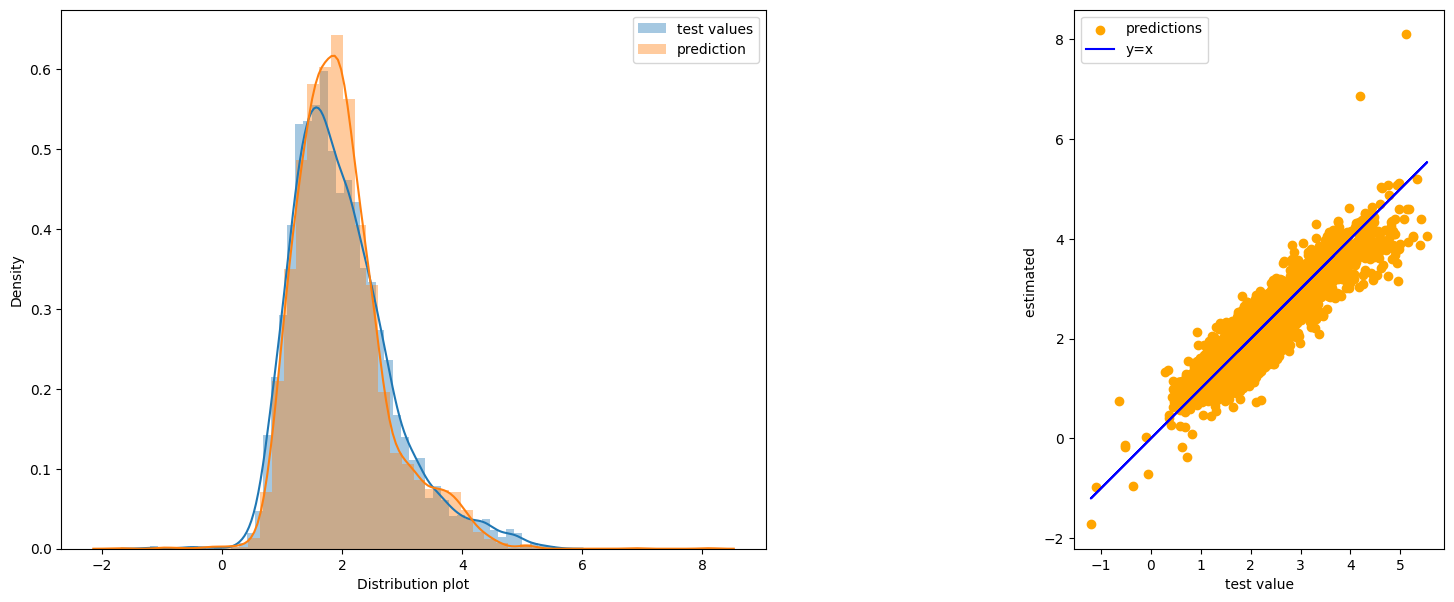

In [ ]:
plot(Y_pred_enet)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train_norm,Y_train)
Y_pred_neigh = neigh.predict(X_test_norm)
score_neigh=score(Y_pred_neigh)
announce(score_neigh)

algorithms.append('k-NN')
scores.append(score_neigh)

The R^2 score achieved using this regression is: 0.763


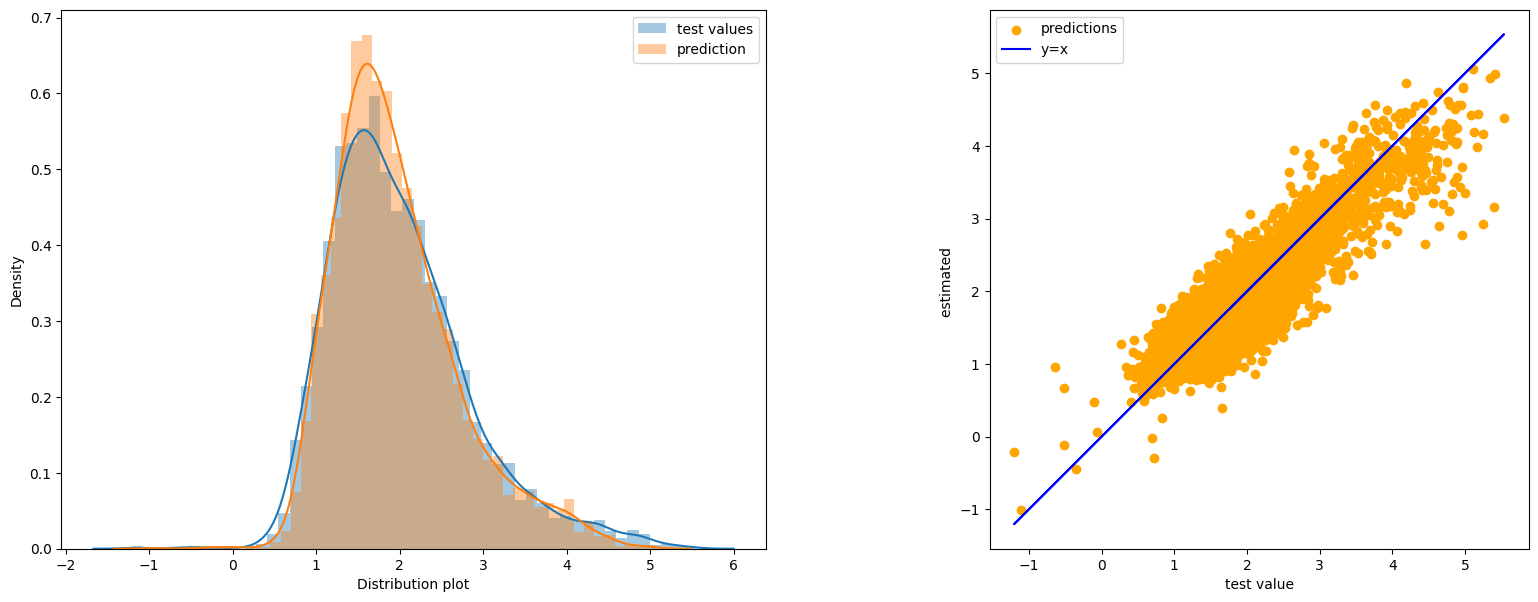

In [ ]:
plot(Y_pred_neigh)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the DecisionTreeRegressor
decTree = DecisionTreeRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=decTree, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_norm, Y_train)

# Get the best model
best_decTree = grid_search.best_estimator_

# Make predictions
Y_pred_tree = best_decTree.predict(X_test_norm)

# Calculate R-squared score
score_tree = score(Y_pred_tree)
announce(score_tree)

# Append the results to the lists
algorithms.append('DTree')
scores.append(score_tree)


The R^2 score achieved using this regression is: 0.772


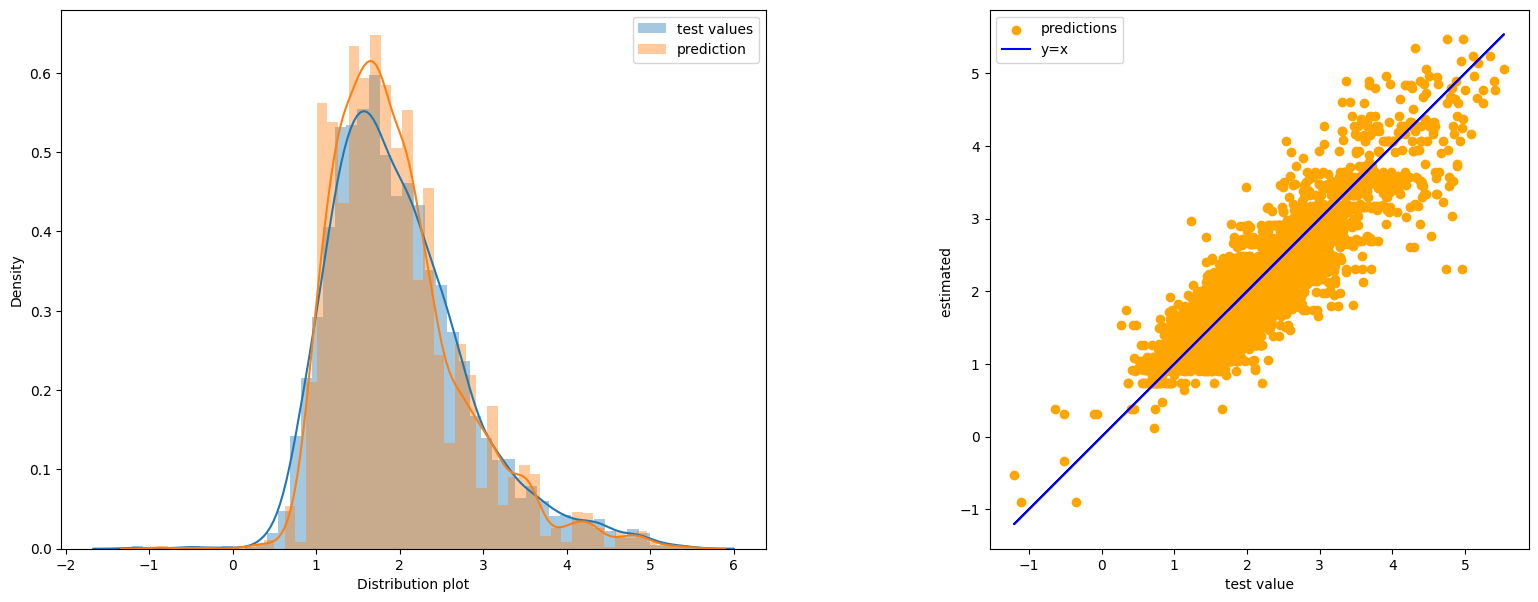

In [ ]:
plot(Y_pred_tree)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=32, n_estimators=50)
forest.fit(X_train_norm,np.ravel(Y_train))
Y_pred_forest = forest.predict(X_test_norm)
score_forest = score(Y_pred_forest)
announce(score_forest)
algorithms.append('RForest')
scores.append(score_forest)

The R^2 score achieved using this regression is: 0.837


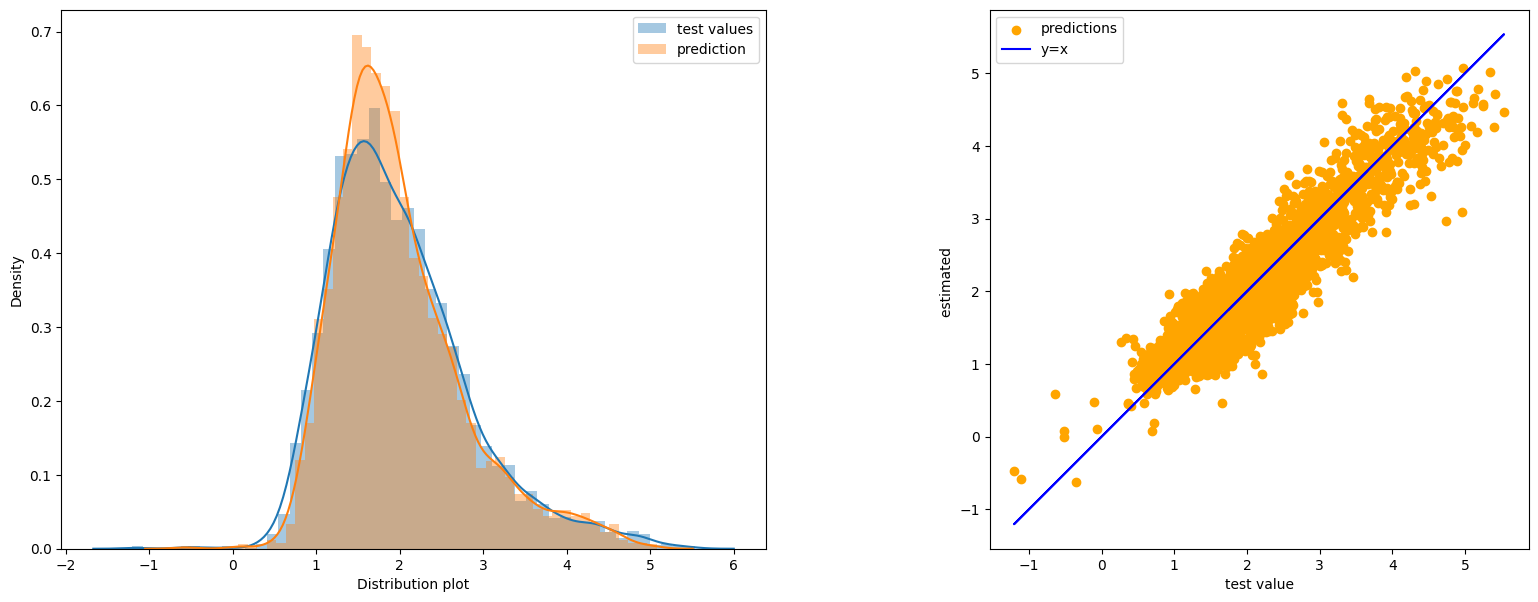

In [ ]:
plot(Y_pred_forest)

In [ ]:
from sklearn import svm

svmreg = svm.SVR()
svmreg.fit(X_train_norm,np.ravel(Y_train))
Y_pred_svm = svmreg.predict(X_test_norm)
score_svm = score(Y_pred_svm)
announce(score_svm)

algorithms.append('SVM')
scores.append(score_svm)

The R^2 score achieved using this regression is: 0.813


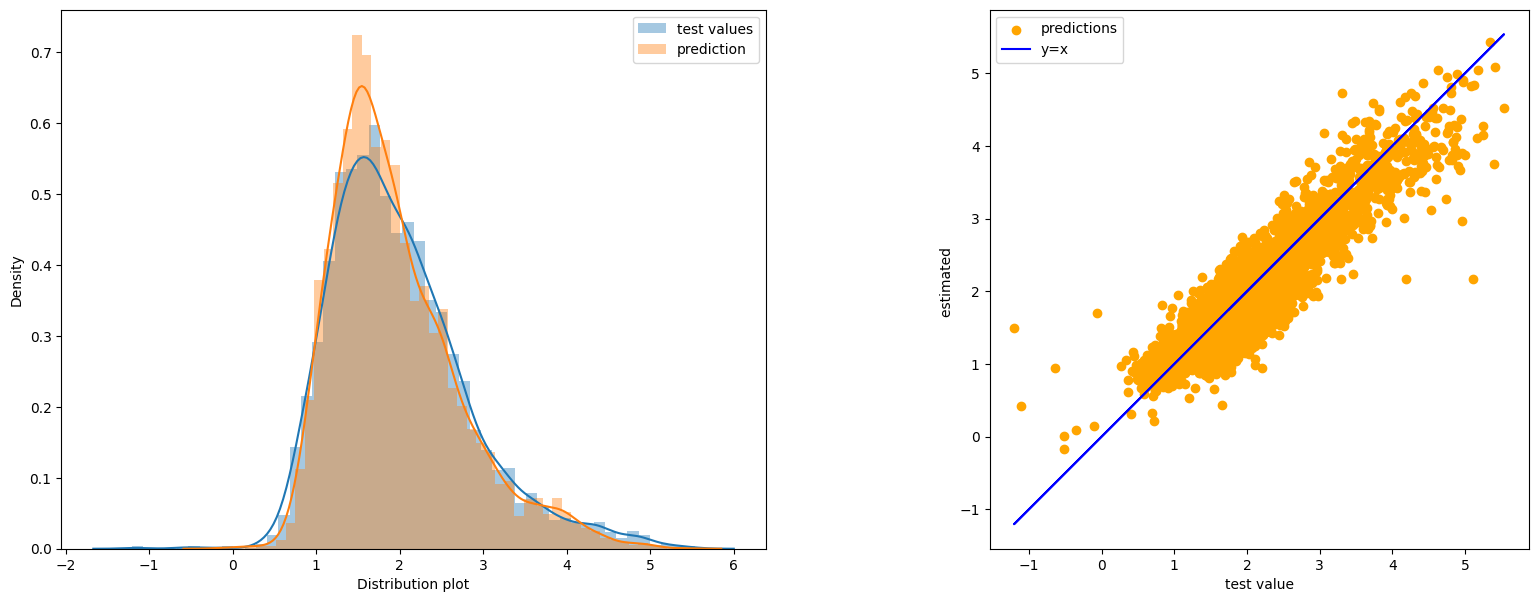

In [ ]:
plot(Y_pred_svm)

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

Adam(learning_rate=0.007)
model = Sequential()
model.add(Dense(24,activation='tanh',input_dim=X_train_norm.shape[1]))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### Training
model.fit(X_train_norm,Y_train,epochs=100,batch_size=256,verbose=False)

### Predicting
Y_pred_nn = model.predict(X_test_norm)

### Scoring
score_nn = score(Y_pred_nn)
announce(score_nn)

algorithms.append('NNet')
scores.append(score_nn)

142/142 [==============================] - 0s 2ms/step
The R^2 score achieved using this regression is: 0.822


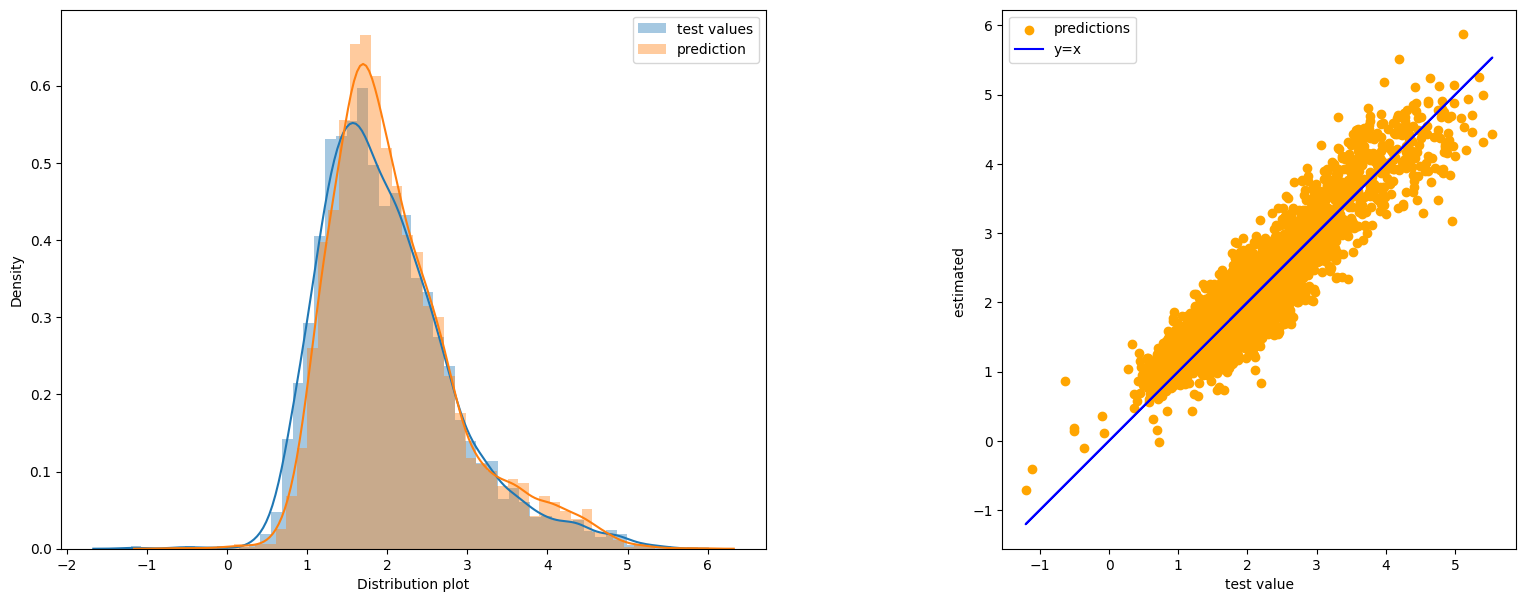

In [ ]:
plot(Y_pred_nn)

In [ ]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

# Define RMSprop optimizer
rmsprop = optimizers.RMSprop(learning_rate=0.005)

# Define the neural network model
model = Sequential()
model.add(Dense(24, activation='tanh', input_dim=X_train_norm.shape[1]))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

# Compile the model with RMSprop optimizer
model.compile(loss='mean_squared_error', optimizer=rmsprop)

# Training
model.fit(X_train_norm, Y_train, epochs=100, batch_size=256, verbose=False)

# Predictions
Y_pred_cnn = model.predict(X_test_norm)

# Scoring
score_cnn = score(Y_pred_cnn)
announce(score_cnn)

# Append results
algorithms.append('NNet with RMSprop')
scores.append(score_cnn)


142/142 [==============================] - 0s 2ms/step
The R^2 score achieved using this regression is: 0.839


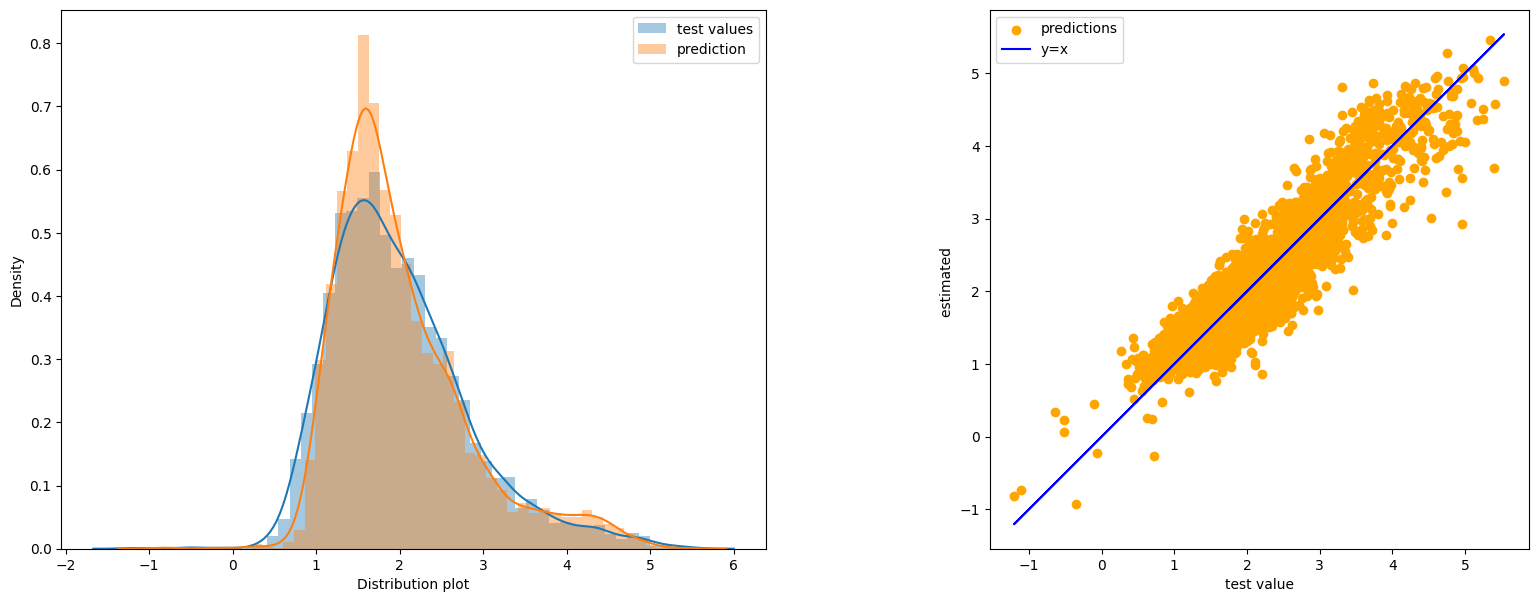

In [ ]:
plot(Y_pred_cnn)

In [ ]:

import xgboost as xgb

# Define XGBRegressor with optimized hyperparameters
xgReg = xgb.XGBRegressor(objective ='reg:squarederror',
                         colsample_bytree = 0.4,
                         learning_rate = 0.05,
                         max_depth = 5,
                         n_estimators = 600)

# Train the model
xgReg.fit(X_train_norm, Y_train)

# Make predictions
Y_pred_xgb = xgReg.predict(X_test_norm)

# Calculate score
score_xgb = xgReg.score(X_test_norm, Y_test)
print("XGBoost Score:", score_xgb)

algorithms.append('XGB')
scores.append(score_xgb)



XGBoost Score: 0.8602716560860952


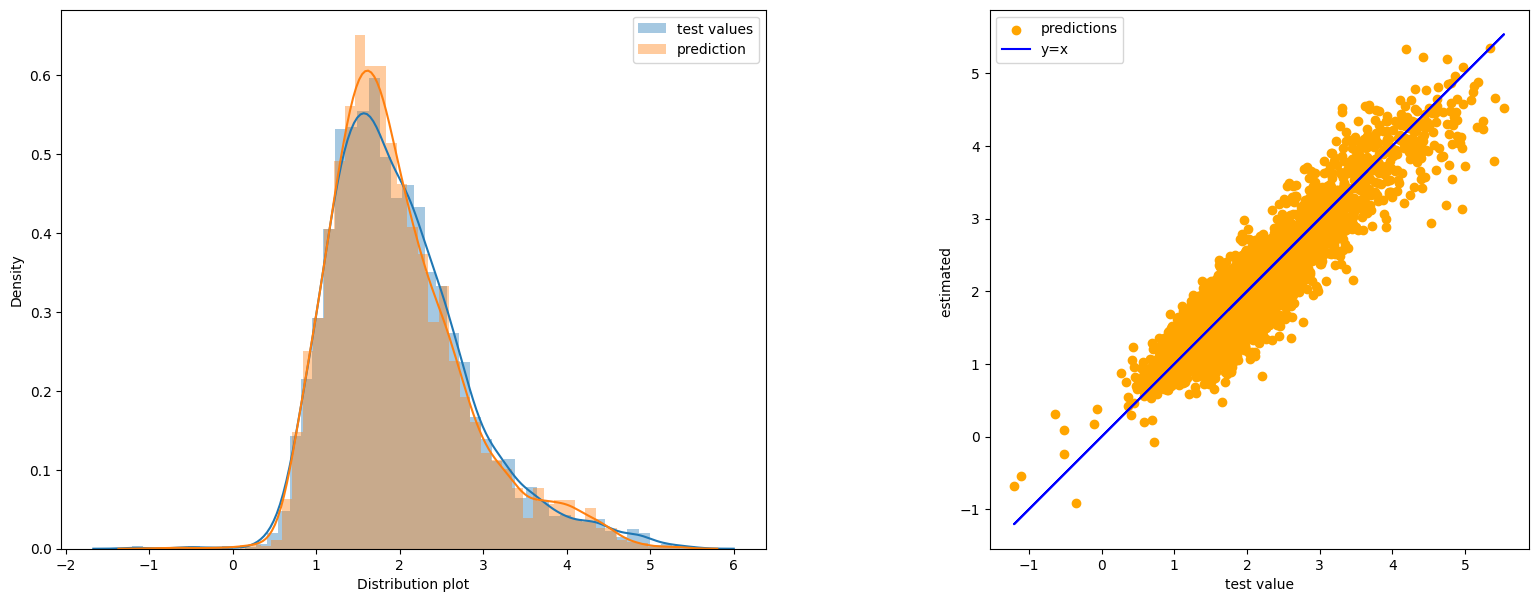

In [ ]:
plot(Y_pred_xgb)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distributions for random search
param_dist = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': sp_randint(3, 6),
    'min_child_samples': sp_randint(10, 31),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [100, 200, 300]
}

# Instantiate LGBMRegressor
lgb_reg = lgb.LGBMRegressor()

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=lgb_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(X_train_norm, Y_train)

# Get the best model
best_lgb_reg = random_search.best_estimator_

# Make predictions
Y_pred_lgb = best_lgb_reg.predict(X_test_norm)

# Calculate R-squared score
algorithms.append('LightGBM')
score_lgb = best_lgb_reg.score(X_test_norm, Y_test)
scores.append(score_lgb)
print("LightGBM Score:", score_lgb)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 18090, number of used features: 28
[LightGBM] [Info] Start training from score 1.982909
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

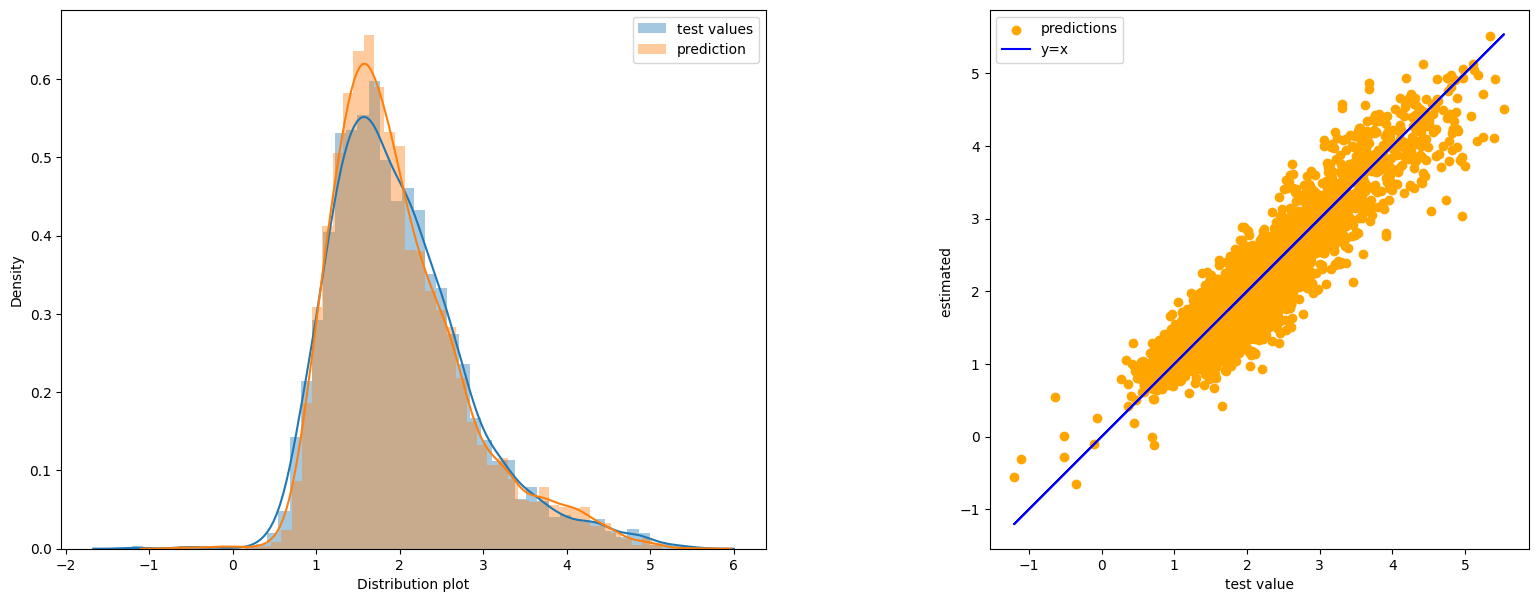

In [ ]:
plot(Y_pred_lgb)

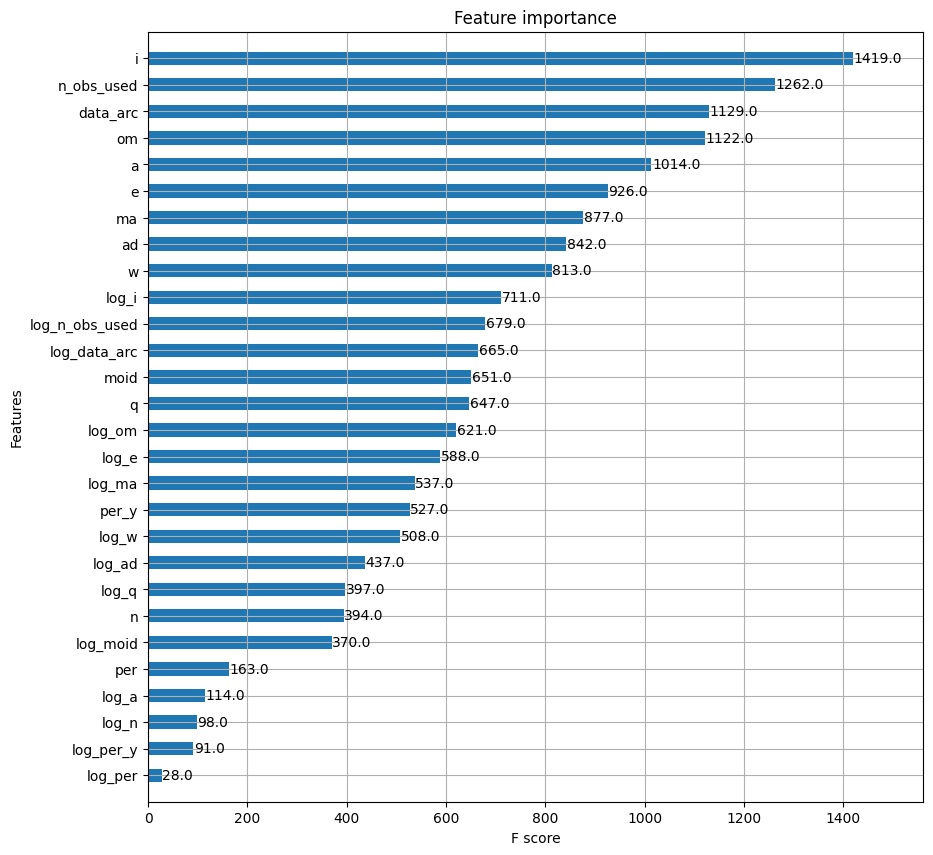

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgReg, height=0.5, ax=ax, importance_type='weight')
plt.show()

In [ ]:
# Check the lengths of algorithms and scores lists
print("Length of algorithms list:", len(algorithms))
print("Length of scores list:", len(scores))

Length of algorithms list: 14
Length of scores list: 14


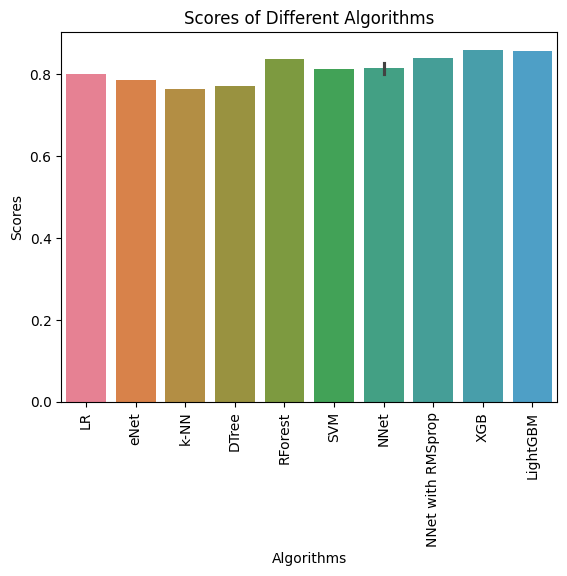

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
colors = sns.color_palette("husl", len(algorithms))

# Create the bar plot with specified colors
sns.barplot(x=algorithms, y=scores, palette=colors)

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Scores of Different Algorithms')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


So here, **XGB wins the race** and gets the first position with an r-squared value of **0.86.**

**KNN lost the race** and got the last position with an r-squared value of **0.772.**
